# Pytorch Session 1: Basic grammar

* Lecture note slide (#10) example

In [28]:
xs = np.array([[[0.8, 0.41, 1], [0.9,0.42,3], [0.7,0.44,4], [0.4,0.45,7]],
                [[0.9, 0.42, 3], [0.7, 0.44, 4], [0.4,0.45,7],[0.1,0.48,4]],
                [[0.7,0.44,4],[0.4,0.45,7],[0.1,0.48,4],[0.1,0.5,1]]
                 ])

In [29]:
ys = np.array([[[3],[4],[7],[4]],
               [[4],[7],[4],[1]],
              [[7],[4],[1],[0]]]) ## 값 할당할 때, 실수형으로 넣고싶으면 1대신 1.0 등 하나라도 실수값 할당해야 반영이되므로 주의

In [30]:
Wh = np.array([[0.4, 0.1],
               [0, -0.1]])
Wx = np.array([[0,0.2],
               [0.1,-0.1],
              [-0.1,0]])
bh = np.array([0,0.2])
Wy = np.array([[-0.1], 
               [0.3]])
by = np.array([0.1])

In [31]:
np.tanh(0.3)
def ReLU(x):
    return x * (x>0)

In [32]:
h0 = np.zeros([1,2])
h0

array([[0., 0.]])

In [33]:
h1 = np.tanh(h0@Wh + xs[:,0,:] @ Wx+bh) #0년치만 받아서 1로 저장 
h1

array([[-0.05893164,  0.30860244],
       [-0.25242392,  0.32569071],
       [-0.34168587,  0.28764781]])

In [34]:
h2 = np.tanh(h1@Wh + xs[:,1,:] @ Wx+bh) 
h2

array([[-0.27435998,  0.292453  ],
       [-0.42761111,  0.23378402],
       [-0.65935651,  0.17038838]])

In [35]:
yhat1 = ReLU(h1@Wy+by)
yhat1

array([[0.19847389],
       [0.2229496 ],
       [0.22046293]])

-- 위 과정을 for문으로 작성 가능/Loss func 직접 정의 --

Pytorch provide the object called ```torch.tensor``` which is almost the same as ```np.array``` except that it is differentiable.

In [36]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## 1. Derivatives

## 1.1 Derivatives

You are given $ y = 2x^3+x $.

Calculate $\frac{d y}{d x}$ at $x=1$.

In [37]:
x = torch.tensor(1.0, requires_grad=True) #미분할테니 추적을 해주세요.
y = 2 * x**3 + x

print(x,y)

tensor(1., requires_grad=True) tensor(3., grad_fn=<AddBackward0>)


In [38]:
y.backward() #y를 requires_grad가 준비된 아이들로 미분하세요.
            #엄청 계산함 ... (시간 많이 소요)

In [39]:
x.grad #계산을 하는 것이 아니고 찾아서 보여줌 ... 

tensor(7.)

In [40]:
print(x)
print(x.data) #x의 값만 보여주기
print(x.grad) #y를 x로 미분한 값 (x=1.0 에서)

tensor(1., requires_grad=True)
tensor(1.)
tensor(7.)


* Caution 1: You cannot calculate ```y.backward()``` again.

In [41]:
# y.backward()
# Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). 
# Specify retain_graph=True if you need to backward through the graph a second time or 
# if you need to access saved tensors after calling backward.

* Caution 2: If you calculate ```y=2*x**3 +x``` and calculate ```y.backward()``` again, then derivatives are accumumated.

In [42]:
y = 2 * x**3 + x
y.backward()
x.grad # derivative is doubled: 7 + 7 = 14

tensor(14.)

In [60]:
x = torch.tensor(1.0, requires_grad=True) 
y = 2 * x**3 + x
y.backward()
print(x.grad)

x = torch.tensor(1.0, requires_grad=True) 
y = 2 * x**3 + x
y.backward()
print(x.grad)

tensor(7.)
tensor(7.)


## Example 1.1.1: 

Calculate $\frac{d}{d x} \cos(x)$ at $x=\pi/3$.

## 1.2 Transform Tensor to Numpy
* `requires_grads=True`인 tensor는 tensor를 바로 .numpy() 로 변환 불가능  
* `.detach().numpy()` 로 변환 가능

In [43]:
a = torch.tensor([1.0,2.0,3.0,12.0])
b = a.numpy()
print(a)
print(b)
b

tensor([ 1.,  2.,  3., 12.])
[ 1.  2.  3. 12.]


array([ 1.,  2.,  3., 12.], dtype=float32)

In [44]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# np.sum(x) # error
np.sum(x.detach().numpy())

6.0

In [ ]:
x = torch.tensor(np.pi/3, requires_grad=True)
y = torch.cos(x)
y.backward()
print(x.grad)

tensor(-0.8660)


In [ ]:
x = torch.tensor(np.pi/3, requires_grad=True)
x.detach().numpy() * np.array(3.0)

In [ ]:
xx = np.array(3.0)
torch.tensor(xx)

## 1.3. Partial Derivates

Calculate partial derivative  $u$ of the following function where $u=2$ and $v=1$: 

$ f(u,v)=uv+(uv)^2$:

In other words, calculate

$\nabla f(1, 2)$.


In [62]:
u = torch.tensor(1.0, requires_grad=True)
v = torch.tensor(2.0, requires_grad=True)

f = u*v+(u*v)**2
f.backward()
print(u.grad, v.grad)

tensor(10.) tensor(5.)


In [64]:
print(u.grad, v.grad)

tensor(10.) tensor(5.)


You can do the same thing with vector $u=(u_1, u_2)$ with 

$f(u_1, u_2)= u_1*u_2 +(u_1*u_2)**2$

In [58]:
u = torch.tensor([2.0, 1.0], requires_grad=True)
f= u[0]*u[1] + (u[0]*u[1])**2
f.backward()
u.grad

tensor([ 5., 10.])

### Example 1.3.1: 
You are given

$y=\exp(2x_1)+x_2^2$.

Calculate $\triangledown y = \left( \frac{\delta y}{\delta x_1}, 
\frac{\delta y}{\delta x_2} \right)$ at $x_1=1.0$ and $x_2=2.0$.

In [68]:
x = torch.tensor([1.0, 2.0], requires_grad=True)
y = torch.exp(2*x[0])+x[1]**2

In [69]:
y.backward()

In [70]:
x.grad

tensor([14.7781,  4.0000])

## 1.4. Gradient descent with Pytorch

You want to minimize the following function using gradient descent algorithm.

$f(x_1, x_2)=(x_1-3)^2 +2.4(x_2-5)^2 +10$.

Your algorithm for the gradient descent algorithm is as follows with learning rate lr$=0.1$.

1. Let's start with $x^{[0]}=(x_1^{[0]}, x_2^{[0]})=(7.0, 3.0)$.

2. Update  $x^{[1]} = x^{[0]} - {\rm lr} \cdot \triangledown f(x^{[0]})$

3. Keep updating until converge

In [47]:
x = torch.tensor([7.0, 3.0], requires_grad=True)
#y = (x[0]-3)**2+2.4*(x[1]-5)**2+10
#y.backward()

#x = x - lr * x.grad

In [48]:
epochs=30
history = []
lr = 0.1

for epoch in range(epochs):
  x.grad=None #값이 accumulate되는 것 방지하기 위해 초기화
  y = (x[0]-3)**2+2.4*(x[1]-5)**2+10
  y.backward() #x.grad 준비 완료
  x.data = x.data - lr * x.grad #x.data 값 update
  print(x.data)
  history.append(y.item()) #30번 시행마다의 y값 저장

tensor([6.2000, 3.9600])
tensor([5.5600, 4.4592])
tensor([5.0480, 4.7188])
tensor([4.6384, 4.8538])
tensor([4.3107, 4.9240])
tensor([4.0486, 4.9605])
tensor([3.8389, 4.9794])
tensor([3.6711, 4.9893])
tensor([3.5369, 4.9944])
tensor([3.4295, 4.9971])
tensor([3.3436, 4.9985])
tensor([3.2749, 4.9992])
tensor([3.2199, 4.9996])
tensor([3.1759, 4.9998])
tensor([3.1407, 4.9999])
tensor([3.1126, 4.9999])
tensor([3.0901, 5.0000])
tensor([3.0721, 5.0000])
tensor([3.0576, 5.0000])
tensor([3.0461, 5.0000])
tensor([3.0369, 5.0000])
tensor([3.0295, 5.0000])
tensor([3.0236, 5.0000])
tensor([3.0189, 5.0000])
tensor([3.0151, 5.0000])
tensor([3.0121, 5.0000])
tensor([3.0097, 5.0000])
tensor([3.0077, 5.0000])
tensor([3.0062, 5.0000])
tensor([3.0050, 5.0000])


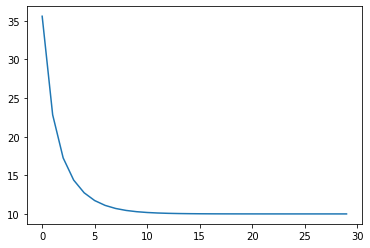

In [49]:
plt.plot(history)

In [50]:
x.data

tensor([3.0050, 5.0000])

## Example 1.4.1:

You are given 

$\theta \,|\, x_1, \cdots, x_n \sim {\rm Gamma}({\rm shape}=2.0, {\rm rate}=1.3)   $.

Find $\theta_0$ such that $P(\theta<\theta_0)=0.95$ as an optimization problem.

Hint: There is no cdf available for Gamma distribution in Pytorch (it is available in Tensorflow though). Alternatively, you may integrate gamma pdf with ```torch.trapezoid``` function to create cdf. You may start with defining cdf function for Gamma distribution.



In [71]:
m = torch.distributions.Gamma(torch.tensor([2.0]), torch.tensor([1.3]))
m.sample()  # Gamma distributed with concentration=1 and rate=1
torch.exp(m.log_prob(2.0))

tensor([0.2510])

In [72]:
def cdf(q): #pgamma function
  x=torch.linspace(0.000001, 1, 1000)*q
  y=torch.exp(m.log_prob(x))
  return torch.trapezoid(y, x)

In [73]:
qq = torch.tensor(2.0, requires_grad=True)
y = cdf(qq)
y.backward()
qq.grad

tensor(0.2510)

In [74]:
epochs=10000
history=[]
lr=0.2

theta0 = torch.tensor(2.0, requires_grad=True)
for epoch in range(epochs):
  theta0.grad=None
  loss = (cdf(theta0)-0.95)**2
  loss.backward()
  theta0.data = theta0.data - lr*theta0.grad
  history.append(loss.item())


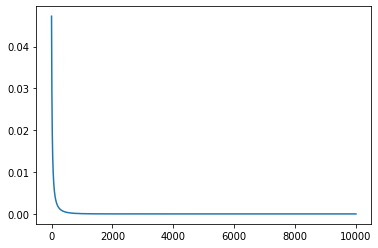

In [75]:
plt.plot(history)

In [76]:
theta0

tensor(3.6491, requires_grad=True)